In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [3]:
# 1. Kalibrieren der x-Achse, u_e Bestimmung 
# 2. Peaks in allen Messungen bestimmen und Zusammenhang plotten, ue Bestimmung 
# 3. Inhomogenität des Magnetfeldes bestimmen, del B delz Bestimmung 
# 4. Apparatekonstanten hinzufügen

In [4]:
bf1  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfiedl1")), delimiter ="\t", skip_header = 3))
bf2  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield2")), delimiter ="\t", skip_header = 3))
bf3  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield3")), delimiter ="\t", skip_header = 3))
bf4  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield4")), delimiter ="\t", skip_header = 3))
bf5  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield5")), delimiter ="\t", skip_header = 3))
bf6  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield6")), delimiter ="\t", skip_header = 3))
bf7  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield7")), delimiter ="\t", skip_header = 3))
bf8  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield8")), delimiter ="\t", skip_header = 3))
bf9  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield9")), delimiter ="\t", skip_header = 3))
bf10 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield10")), delimiter ="\t", skip_header = 3))
bf11 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield11")), delimiter ="\t", skip_header = 3))

bfields = [bf1,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,bf11]

a=1
xer = (a)/(2 * np.sqrt(3))

u_val1 = np.sqrt(((bf1[:,0]- 400)/(1000-400)*xer)**2)
u_val2 = np.sqrt(((bf1[:,0]- 400)/(1000-400)*xer + xer)**2 )

u_ges = np.sqrt( (u_val1)**2 + (u_val2)**2 )
print(len(u_ges))

101


c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  

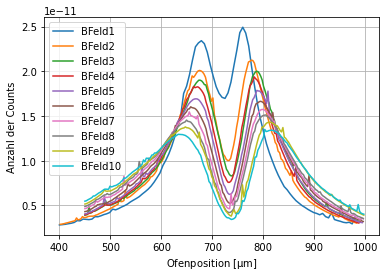

In [5]:
xcalib = [(400,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000)]
ycalib = [(400,980),(450,983),(450,989),(450,990),(450,994),(450,996),(450,996),(450,996),(450,997),(450,997)]

def linear(m,b,x):
    return m*x+b

bcalibrated =[]
for  i in range(len(xcalib)):
    popt,cov = curve_fit(linear,xcalib[i],ycalib[i])
    bcalibrated.append(popt[1]*bfields[i][:,0]+popt[0])
    plt.plot(popt[1]*bfields[i][:,0]+popt[0],bfields[i][:,1],label="BFeld"+str(i+1))
    plt.xlabel(r"Ofenposition [$\mathrm{\mu m}$]")
    plt.ylabel(r"Anzahl der Counts")
    plt.legend(loc=2)
    plt.grid(True)

In [11]:
def doublegaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,
    b: float, mu2: float, sigma2: float,
    y0: float): 
    return (
        y0
        + a * np.exp((-np.abs(x-mu1)**2)/(2*sigma1**2))
        + b * np.exp((-np.abs(x-mu2)**2)/(2*sigma2**2))
    )

In [12]:
def fitdoublegaussian(array,p0):
    x,y = array.T[0:2]
    popt1,pcov1 = curve_fit(doublegaussian,x,y,p0=p0)
    print("Peak1: "+str(popt1[1]),"+/-","Abweichung: "+str(popt1[2]),";","Peak2: "+str(popt1[4]),"+/-","Abweichung: "+str(popt1[5]))
    plt.scatter(x,y,label="data",s=2)
    plt.plot(x,doublegaussian(x,*popt1),label="fit"+str(i))
    plt.legend(loc=0)
    plt.show()
    #plt.savefig("doublegauß.png")

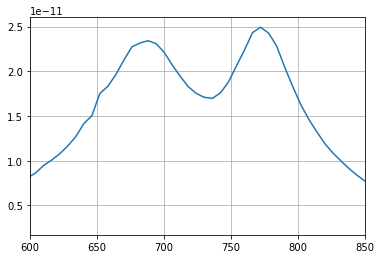

In [13]:
plt.plot(bf1[:,0],bf1[:,1])
plt.xlim(600,850)
plt.grid(True)
#plt.plot(np.arange(0,bf1[:,0]),bf1[:,1])

Peak1: 681.9390868681128 +/- Abweichung: 42.86430293850337 ; Peak2: 780.520327015535 +/- Abweichung: 31.2355390216087


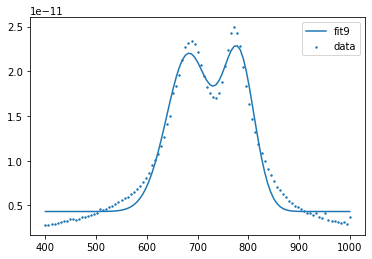

In [14]:
fitdoublegaussian(bf1, (2e-11, 685, 70, 
                          2e-11, 770, 40, 3e-12))

Peak1: 672.5411721484552 +/- Abweichung: 41.435410896722495 ; Peak2: 767.8362866971061 +/- Abweichung: 30.194249130547338


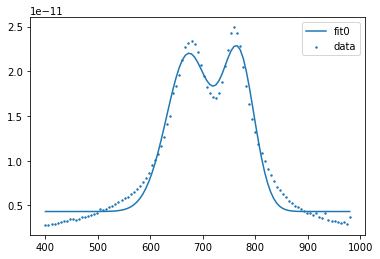

Peak1: 664.515428093287 +/- Abweichung: 43.10879001383022 ; Peak2: 786.1272262139246 +/- Abweichung: 32.0094013129346


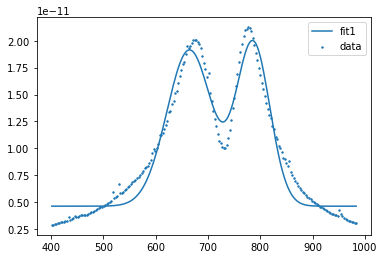

Peak1: 664.4798789774942 +/- Abweichung: 42.90224479232834 ; Peak2: 797.5847645846718 +/- Abweichung: 32.15158287430368


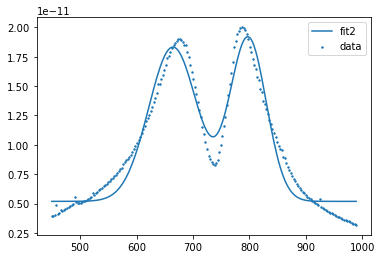

Peak1: 658.0392060121274 +/- Abweichung: 43.35025459428848 ; Peak2: 794.0835459839785 +/- Abweichung: 32.20563345843018


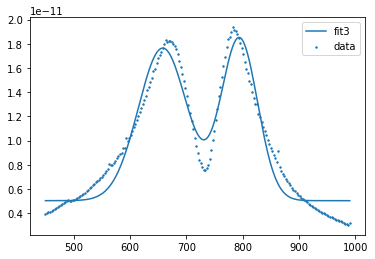

Peak1: 653.3568888756489 +/- Abweichung: 44.717324135692984 ; Peak2: 801.5124109205767 +/- Abweichung: 32.59102846667826


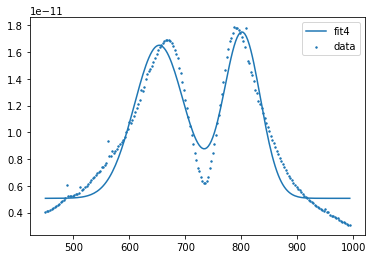

Peak1: 646.048758787799 +/- Abweichung: 45.25811259925074 ; Peak2: 806.5395971386865 +/- Abweichung: 34.112921234265734


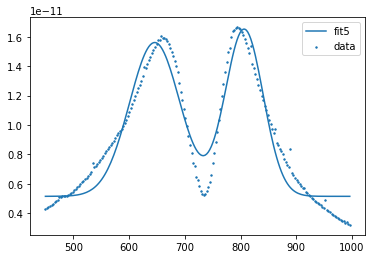

Peak1: 639.1991787954934 +/- Abweichung: 46.796354530974405 ; Peak2: 810.4890839276206 +/- Abweichung: 34.585672067235905


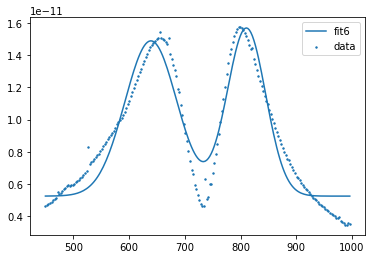

Peak1: 631.8123960399502 +/- Abweichung: 48.6138145671856 ; Peak2: 814.6897402085633 +/- Abweichung: 35.26574525435505


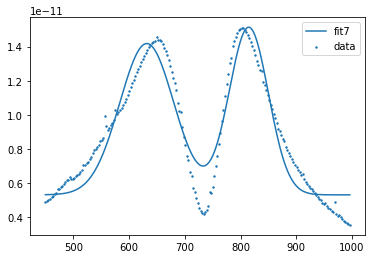

Peak1: 628.4236560471347 +/- Abweichung: 49.47192132402436 ; Peak2: 826.3298289911431 +/- Abweichung: 36.43951759996571


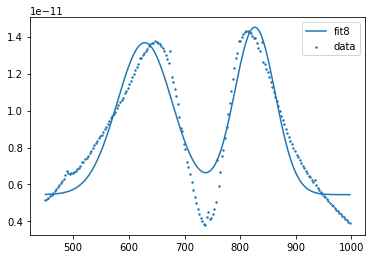

Peak1: 616.9048987828348 +/- Abweichung: 52.82568068392082 ; Peak2: 830.4228700140359 +/- Abweichung: 37.46153845919432


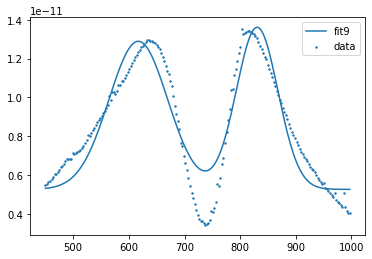

In [16]:
for i in range(len(bcalibrated)):
    test = np.column_stack((bcalibrated[i],bfields[i][:,1]))
    fitdoublegaussian(test, (2e-11, 685, 70, 
                          2e-11, 790, 40, 0e-12))

In [9]:
def supergaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,p1:float,
    b: float, mu2: float, sigma2: float,p2:float,
    y0: float): 
    return (
        y0
        + a * np.exp(-np.abs(x-mu1)**p1/sigma1)
        + b * np.exp(-np.abs(x-mu2)**p2/sigma2)
    )

In [10]:
def fitsupergaussian(array,p0):
    x,y = array.T[0:2]
    popt1,pcov1 = curve_fit(supergaussian,x,y,p0=p0)
    print("Peak1: "+str(popt1[1]),"+/-","Abweichung: "+str(popt1[3]),";","Peak2: "+str(popt1[5]),"+/-","Abweichung: "+str(popt1[7]))
    plt.scatter(x,y,label="data",s=2)
    plt.plot(x,supergaussian(x,*popt1),label="fit"+str(i))
    plt.legend(loc=0)
    plt.show()
    #plt.savefig("doublegauß.png")

Peak1: 671.2018946568822 +/- Abweichung: 1.0341897088802254 ; Peak2: 763.5094174380278 +/- Abweichung: 0.9799181111565368


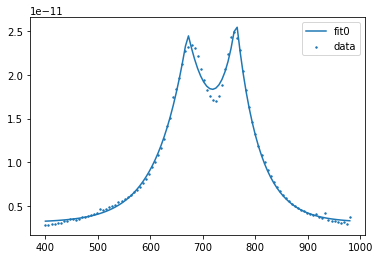

Peak1: 665.095966302095 +/- Abweichung: 1.0523131530854877 ; Peak2: 785.5971238937456 +/- Abweichung: 1.2036369384532093


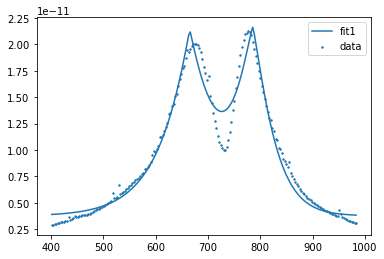

Peak1: 669.1174025332882 +/- Abweichung: 1.1558451599569248 ; Peak2: 801.9510317809913 +/- Abweichung: 2.671980282752878


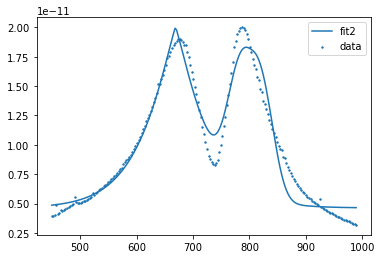

Peak1: 662.6123321441812 +/- Abweichung: 1.1293432256326985 ; Peak2: 798.5201161223378 +/- Abweichung: 2.730549181775075


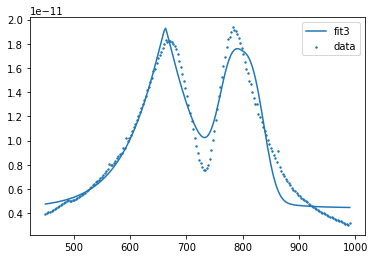

Peak1: 656.2032158820887 +/- Abweichung: 1.3839122687895582 ; Peak2: 804.8239236314795 +/- Abweichung: 2.673760724024383


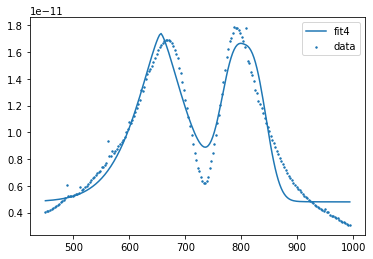

Peak1: 647.332869698445 +/- Abweichung: 1.752901840810473 ; Peak2: 808.4388528788008 +/- Abweichung: 2.865646764169478


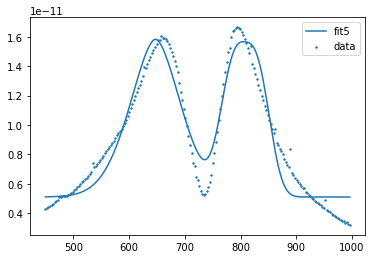

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.

In [16]:
for i in range(len(bcalibrated)):
    test = np.column_stack((bcalibrated[i],bfields[i][:,1]))
    fitsupergaussian(test, (1, 685, 40,2, 
                          1, 790, 70,2, 0))